In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("../../../Data/titanic_Dataset.csv",usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [67]:
df.dropna(inplace=True)

In [68]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train

(571, 2) (143, 2) (571,) (143,)


,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000
...,...,...
92,46.0,61.1750
134,25.0,13.0000
337,41.0,134.5000
548,33.0,20.5250


In [70]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

binning_encoder = ColumnTransformer(transformers=[
    ("age_encod",KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform'), ['Age']),
    ("fare_encod",KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform'), ['Fare']),
])

In [71]:
X_train_encod = binning_encoder.fit_transform(X_train)
X_test_encod = binning_encoder.transform(X_test)

In [72]:
X_test_encod

array([[5., 0.],
       [0., 0.],
       [3., 0.],
       [2., 1.],
       [5., 0.],
       [0., 0.],
       [4., 0.],
       [6., 0.],
       [3., 0.],
       [2., 0.],
       [2., 1.],
       [4., 0.],
       [3., 1.],
       [4., 0.],
       [4., 9.],
       [2., 0.],
       [2., 0.],
       [1., 1.],
       [3., 0.],
       [6., 1.],
       [1., 0.],
       [6., 0.],
       [1., 0.],
       [4., 9.],
       [2., 0.],
       [2., 0.],
       [1., 0.],
       [3., 0.],
       [1., 0.],
       [4., 0.],
       [2., 0.],
       [1., 0.],
       [4., 0.],
       [4., 0.],
       [4., 0.],
       [4., 0.],
       [4., 0.],
       [6., 0.],
       [7., 0.],
       [6., 0.],
       [1., 0.],
       [2., 0.],
       [4., 2.],
       [6., 0.],
       [6., 1.],
       [3., 0.],
       [4., 0.],
       [2., 0.],
       [4., 0.],
       [5., 0.],
       [4., 1.],
       [2., 0.],
       [3., 1.],
       [3., 0.],
       [3., 0.],
       [7., 0.],
       [3., 0.],
       [0., 0.],
       [3., 0.

# Accuracy

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train_encod,y_train)
y_pred = lr.predict(X_test_encod)
accuracy_score(y_test,y_pred)

0.6713286713286714

In [74]:
from sklearn.model_selection import cross_val_score

X_trf = binning_encoder.fit_transform(X)
print(np.mean(cross_val_score(estimator=LogisticRegression(),X=X_trf,y=y,cv=10,scoring='accuracy')))

0.6610524256651017


In [75]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_encod,y_train)
y_pred = clf.predict(X_test_encod)
accuracy_score(y_test,y_pred)

0.6783216783216783

In [76]:
print(np.mean(cross_val_score(estimator=DecisionTreeClassifier(),X=X_trf,y=y,cv=10,scoring='accuracy')))

0.6864632237871675


In [83]:
def BinningApply(nbins, strategy):
    binning_encoder = ColumnTransformer(transformers=[
        ("age_encod",KBinsDiscretizer(encode='ordinal', n_bins=nbins, strategy=strategy), ['Age']),
        ("fare_encod",KBinsDiscretizer(encode='ordinal', n_bins=nbins, strategy=strategy), ['Fare']),
    ])
    
    X_trf = binning_encoder.fit_transform(X)
    print(np.mean(cross_val_score(estimator=LogisticRegression(),X=X_trf,y=y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(16,8))
    plt.subplot(221)
    plt.hist(X['Age'],color='green')
    
    plt.subplot(222)
    plt.hist(X_trf[:,0],color='red')
    
    plt.subplot(223)
    plt.hist(X['Fare'], color='purple')
    
    plt.subplot(224)
    plt.hist(X_trf[:,1])
    
    

0.6610524256651017


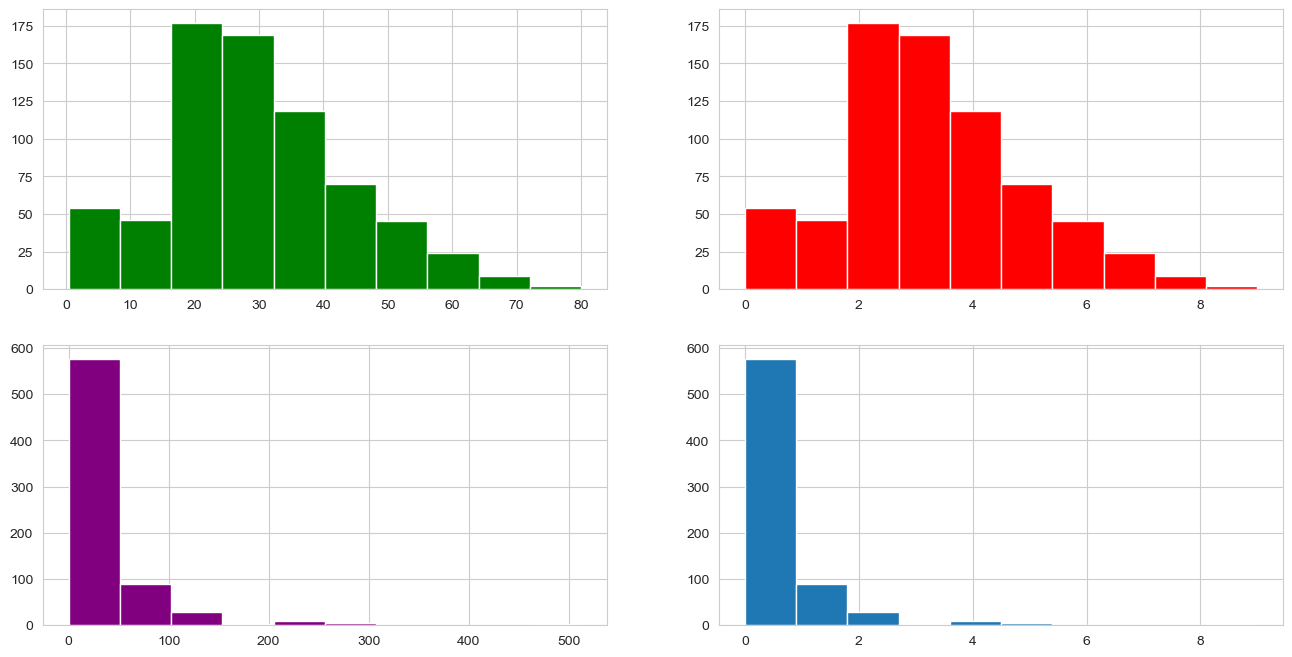

In [84]:
BinningApply(10,'uniform')

0.6710485133020343


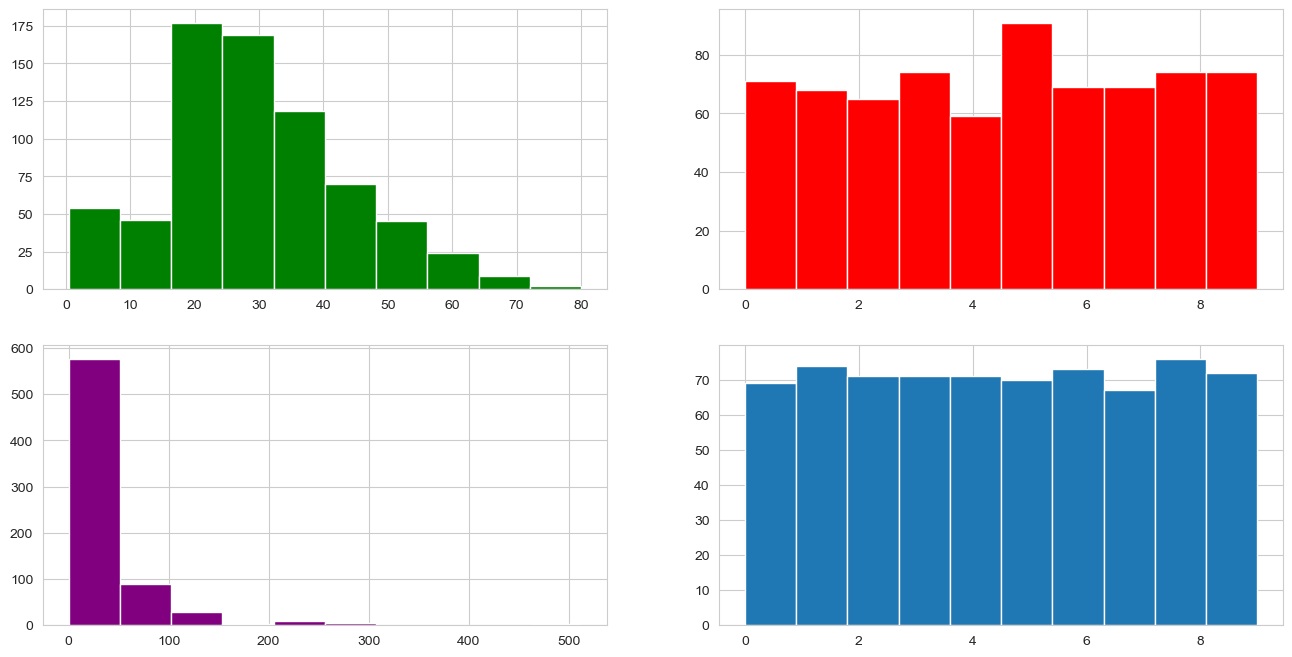

In [85]:
BinningApply(10,'quantile')

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6653169014084508


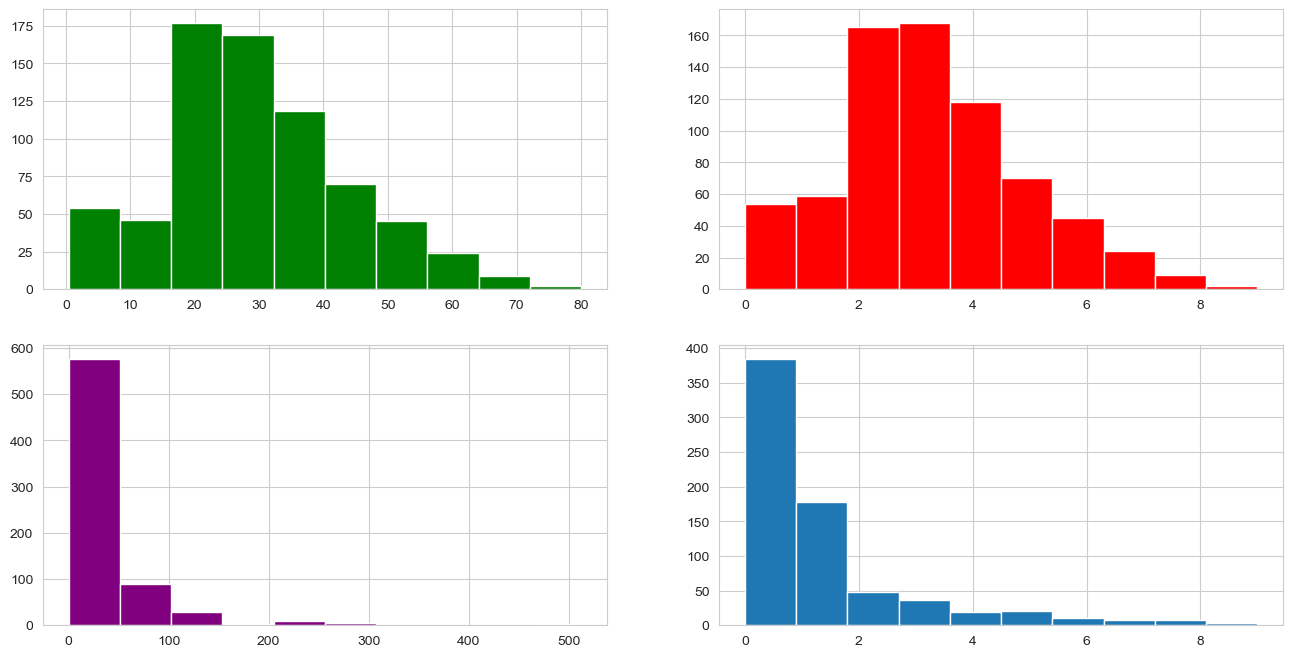

In [86]:
BinningApply(10,'kmeans')